In [12]:
import pandas as pd
import matplotlib.pyplot as plt
names1880 = pd.read_csv('yob1880.txt', names =['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [3]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [4]:
#assemble all the data to year field by using pandas.concat
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']
for year in years:
    path = 'yob%d.txt' % year
    frame = pd.read_csv(path, names = columns)
    
    frame['year'] = year
    pieces.append(frame)
    
# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [5]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [9]:
total_births = names.pivot_table('births', index = 'year', columns ='sex', aggfunc = 'sum')

In [10]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


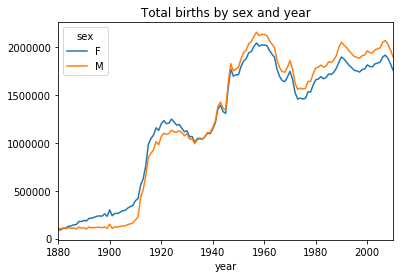

In [14]:
total_births.plot(title = 'Total births by sex and year')

In [23]:
# fraction of babies given to each particular name 
def add_prop(group):
    group['prop'] = group.births/group.births.sum()
    return group
names = names.groupby(['sex','year']).apply(add_prop)

In [24]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [25]:
#verify 
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
      M      1.0
1883  F      1.0
      M      1.0
1884  F      1.0
      M      1.0
1885  F      1.0
      M      1.0
1886  F      1.0
      M      1.0
1887  F      1.0
      M      1.0
1888  F      1.0
      M      1.0
1889  F      1.0
      M      1.0
1890  F      1.0
      M      1.0
1891  F      1.0
      M      1.0
1892  F      1.0
      M      1.0
1893  F      1.0
      M      1.0
1894  F      1.0
      M      1.0
            ... 
1996  F      1.0
      M      1.0
1997  F      1.0
      M      1.0
1998  F      1.0
      M      1.0
1999  F      1.0
      M      1.0
2000  F      1.0
      M      1.0
2001  F      1.0
      M      1.0
2002  F      1.0
      M      1.0
2003  F      1.0
      M      1.0
2004  F      1.0
      M      1.0
2005  F      1.0
      M      1.0
2006  F      1.0
      M      1.0
2007  F      1.0
      M      1.0
2008  F      1.0
      M      1.0
2009  F      1.0
    

In [30]:
def get_top1000(group):
    return group.sort_values(by = 'births', ascending = False)
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
# Drop the group index, not needed
top1000.reset_index(inplace = True, drop = True)

In [31]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [59]:
#Also do it by this way
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by = 'births', ascending = False)[:1000])
top1000 = pd.concat(pieces , ignore_index = True)

In [34]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [42]:
boys = top1000[top1000.sex == 'M']

In [43]:
girls = top1000[top1000.sex == 'F']

In [44]:
total_births = top1000.pivot_table('births', index = 'year', columns = 'name', aggfunc = sum)

In [49]:
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
1885,NaN,NaN,NaN,88.0,NaN,6.0,NaN,NaN,NaN,88.0,...,6.0,27.0,NaN,NaN,12.0,6.0,14.0,48.0,38.0,NaN
1886,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,84.0,...,13.0,25.0,NaN,NaN,8.0,NaN,20.0,52.0,43.0,NaN
1887,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,104.0,...,9.0,34.0,NaN,NaN,23.0,NaN,28.0,46.0,33.0,NaN
1888,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,137.0,...,11.0,42.0,NaN,NaN,23.0,7.0,30.0,42.0,45.0,NaN


In [46]:
boys

,name,sex,births,year,prop
942,John,M,9655,1880,0.087381
943,William,M,9533,1880,0.086277
944,James,M,5927,1880,0.053641
945,Charles,M,5348,1880,0.048401
946,George,M,5126,1880,0.046392
947,Frank,M,3242,1880,0.029341
948,Joseph,M,2632,1880,0.023821
949,Thomas,M,2534,1880,0.022934
950,Henry,M,2444,1880,0.022119
951,Robert,M,2416,1880,0.021866


In [48]:
girls

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


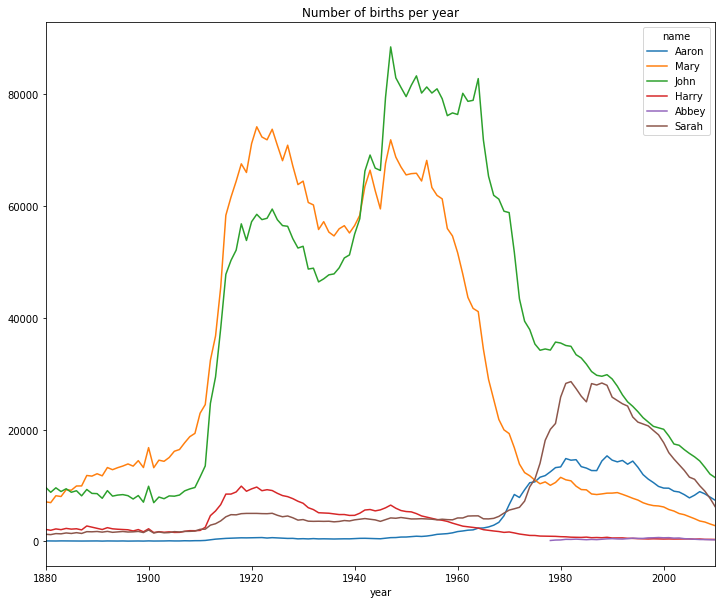

In [58]:
subset = total_births[['Aaron','Mary','John','Harry','Abbey','Sarah']]
subset.plot(subplots = False, figsize =(12,10), grid = False, title = "Number of births per year")

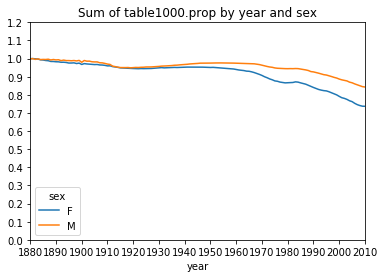

In [61]:
# Measuring the increase in naming diversity, decreaes means fewer parents are choosing common names for their children
import numpy as np
table = top1000.pivot_table('prop', index = 'year', columns= 'sex', aggfunc = sum)
table.plot(title = 'Sum of table1000.prop by year and sex', yticks = np.linspace(0, 1.2, 13), xticks = range(1880, 2020, 10))
        

In [62]:
print(table)

sex          F         M
year                    
1880  1.000000  0.997375
1881  1.000000  1.000000
1882  0.998702  0.995646
1883  0.997596  0.998566
1884  0.993156  0.994539
1885  0.992251  0.995501
1886  0.989504  0.995035
1887  0.988279  0.996697
1888  0.984241  0.992429
1889  0.984061  0.994981
1890  0.982566  0.992749
1891  0.982177  0.993725
1892  0.979746  0.988815
1893  0.980001  0.991720
1894  0.978571  0.989048
1895  0.975479  0.989071
1896  0.975660  0.988041
1897  0.976558  0.989349
1898  0.972806  0.987197
1899  0.975170  0.990115
1900  0.967760  0.979702
1901  0.972304  0.989603
1902  0.970467  0.985749
1903  0.969490  0.986020
1904  0.968142  0.982502
1905  0.967038  0.981650
1906  0.967535  0.981759
1907  0.964942  0.976975
1908  0.964500  0.976409
1909  0.962744  0.973412
...        ...       ...
1981  0.867232  0.944762
1982  0.868208  0.944435
1983  0.871602  0.945170
1984  0.870201  0.944705
1985  0.866046  0.942412
1986  0.862619  0.939833
1987  0.858719  0.937574


In [63]:
# number of distinct names, in order of popularity in top 50% births
df = boys[boys.year == 2010]
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
260882,Alexander,M,16634,2010,0.008762
260883,Noah,M,16281,2010,0.008576
260884,Daniel,M,15679,2010,0.008259
260885,Aiden,M,15403,2010,0.008114
260886,Anthony,M,15364,2010,0.008093


In [66]:
prop_cumsum = df.sort_values(by = 'prop', ascending= False).prop.cumsum()
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [67]:
prop_cumsum.values.searchsorted(0.5)

116

In [68]:
df = boys[boys.year == 1900]
in1900 = df.sort_values(by = 'prop', ascending = False).prop.cumsum()
in1900.values.searchsorted(0.5)+1

25

In [69]:
# now applying this operation to each year gives
def get_quantile_count(group, q = 0.5):
    group = group.sort_values(by ='prop', ascending= False)
    return group.prop.cumsum().values.searchsorted(q) +1
diversity = top1000.groupby(['year','sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')


In [70]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


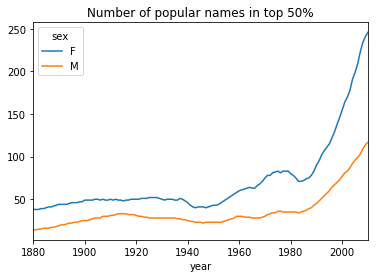

In [71]:
diversity.plot(title="Number of popular names in top 50%")

In [73]:
# The 'Last letter revolution'
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
table = names.pivot_table('births', index = last_letters, columns =['sex', 'year'], aggfunc = sum)

In [ ]:
subtable = table.reindex(columns =[1910,1960,2010], level = 'year')